<a href="https://colab.research.google.com/github/HodaMemar/A3/blob/main/Pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
import seaborn as sns

ساختار فایل ورودی در این مرحله

In [3]:
filename="/content/drive/MyDrive/PaperA3/CUI/CUI__0.csv"
df=pd.read_csv(filename)
df

,Unnamed: 0,HADM_ID,title_span,category_Inner,negex,entity_text,first_cuid,canonical_name,label,CATEGORY,DRG_CODE,GENDER,AGE,CHARTDATE,TAA
0,0,157267,Allergies:,allergies,False,Codeine,C0009214,codeine,CHEMICAL,Discharge summary,391,F,76,2124-09-28 00:00:00,9
1,1,157267,CC:,chief_complaint,False,Emesis,C0042963,Vomiting,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
2,2,157267,CC:,chief_complaint,False,diarrhea,C0011991,Diarrhea,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
3,3,157267,CC:,chief_complaint,False,fever,C0015967,Fever,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
4,4,157267,HPI:,history_of_present_illness,False,ESRD,C0022661,"Kidney Failure, Chronic",DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,99545,186138,Neuro:,neurological,False,solumedrol,C0701466,Solu-Medrol,CHEMICAL,Nursing/other,166,M,66,2195-11-22 00:00:00,29
99546,99546,186138,NaN,NaN,False,FIO2,C0428167,Inspired fraction of oxygen,CHEMICAL,Nursing/other,166,M,66,2195-11-23 00:00:00,30
99547,99547,186138,NaN,NaN,False,acidemia,C0268030,Acidemia,DISEASE,Nursing/other,166,M,66,2195-11-23 00:00:00,30
99548,99548,186138,NaN,NaN,True,PEEP,C0032740,Positive End-Expiratory Pressure,CHEMICAL,Nursing/other,166,M,66,2195-11-23 00:00:00,30


In [4]:
df[['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label']]

,HADM_ID,category_Inner,negex,first_cuid,canonical_name,label
0,157267,allergies,False,C0009214,codeine,CHEMICAL
1,157267,chief_complaint,False,C0042963,Vomiting,DISEASE
2,157267,chief_complaint,False,C0011991,Diarrhea,DISEASE
3,157267,chief_complaint,False,C0015967,Fever,DISEASE
4,157267,history_of_present_illness,False,C0022661,"Kidney Failure, Chronic",DISEASE
...,...,...,...,...,...,...
99545,186138,neurological,False,C0701466,Solu-Medrol,CHEMICAL
99546,186138,NaN,False,C0428167,Inspired fraction of oxygen,CHEMICAL
99547,186138,NaN,False,C0268030,Acidemia,DISEASE
99548,186138,NaN,True,C0032740,Positive End-Expiratory Pressure,CHEMICAL


این تابع برای تفاوت قائل شدن بین مفهوم مثبت و منفی است

In [4]:
def negative(x, y):
        if(x ==True):
            r='not_' + y 
        else:
            r=y
        return r             


#First solution : Integrate all CUI_#
---


برای پیوت کردن یک راه این است که همه فایل های مرحله قبل را ابتدا یکی کنیم و بعد 
وارد مرحله پیوت شویم. ولی این کار باعث کندی بسیار زیاد میشود
امکان موازی سازی هم به راحتی فراهم نیست چون عملیات روی تعدادی از رکورد های پانداس است.

این مرحله قبلا انجام شده است و نتیجه آن در آدرس زیر است:

'/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv'


In [6]:
df = pd.DataFrame(columns=['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label'])
df

,HADM_ID,category_Inner,negex,first_cuid,canonical_name,label


In [ ]:


for i in range(0,76):
  filename="/content/drive/MyDrive/PaperA3/CUI/CUI__"+str(i)+".csv"
  if (exists(filename)==True):
          print(df.shape)
          df1=pd.read_csv(filename)
          df1=df1[['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label']]
          df1['Neg_CUI'] = df1.apply(lambda x: negative(x['negex'], x['first_cuid']), axis=1)          
          df=pd.concat([df, df1])


In [ ]:
df.to_csv('/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv')

#ایچاد دیتاست های مختلف برای تست کردن

ادامه اجرا از این قسمت انجام میشود

In [3]:
df=pd.read_csv('/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv')

<ipython-input-3-e6a8d89990a8>:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv')


#ایجاد دیتاست ها برای آزمون ablation

(6925686, 8)
(24536, 4)


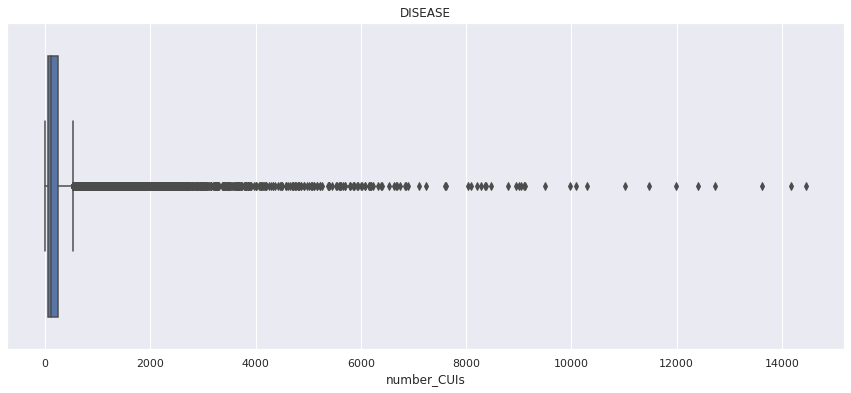

In [4]:
ls_Categories=['chief_complaint',  'history_of_present_illness',  'labs_and_studies',  'past_medical_history', 'physical_exam' ,  'observation_and_plan']
df_disease=df[(df['category_Inner'].isin(ls_Categories)) & (df['label']=='DISEASE')]
print(df_disease.shape)

df_disease_Pivot=df_disease.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_disease_Pivot['term']=[','.join(map(str, l)) for l in df_disease_Pivot['list_CUIs']]
df_disease_Pivot['number_CUIs']=df_disease_Pivot['list_CUIs'].str.len()
print(df_disease_Pivot.shape)
df_disease_Pivot


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_disease_Pivot['number_CUIs']).set(title='DISEASE')

In [ ]:
df_CHEMICAL=df[(df['category_Inner'].isin(ls_Categories)) & (df['label']=='CHEMICAL')]
df_CHEMICAL.shape

df_CHEMICAL_Pivot=df_CHEMICAL.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_CHEMICAL_Pivot['term']=[','.join(map(str, l)) for l in df_CHEMICAL_Pivot['list_CUIs']]
df_CHEMICAL_Pivot['number_CUIs']=df_CHEMICAL_Pivot['list_CUIs'].str.len()
print(df_CHEMICAL_Pivot.shape)



sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_CHEMICAL_Pivot['number_CUIs']).set(title='CHEMICAL')

In [ ]:
df_DISEASE_CHEMICAL=df[(df['category_Inner'].isin(ls_Categories))]
df_DISEASE_CHEMICAL.shape

df_DISEASE_CHEMICAL_Pivot=df_DISEASE_CHEMICAL.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_DISEASE_CHEMICAL_Pivot['term']=[','.join(map(str, l)) for l in df_DISEASE_CHEMICAL_Pivot['list_CUIs']]
df_DISEASE_CHEMICAL_Pivot['number_CUIs']=df_DISEASE_CHEMICAL_Pivot['list_CUIs'].str.len()
print(df_DISEASE_CHEMICAL_Pivot.shape)



sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_DISEASE_CHEMICAL_Pivot['number_CUIs']).set(title='DISEASE_CHEMICAL')

In [ ]:
df_chief_complaint=df[(df['category_Inner']=='chief_complaint')]
df_chief_complaint.shape

df_chief_complaint_Pivot=df_chief_complaint.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_chief_complaint_Pivot['term']=[','.join(map(str, l)) for l in df_chief_complaint_Pivot['list_CUIs']]
df_chief_complaint_Pivot['number_CUIs']=df_chief_complaint_Pivot['list_CUIs'].str.len()
print(df_chief_complaint_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_chief_complaint_Pivot['number_CUIs']).set(title='chief_complaint')

In [ ]:
df_history_of_present_illness=df[(df['category_Inner']=='history_of_present_illness')]
df_history_of_present_illness.shape

df_history_of_present_illness_Pivot=df_history_of_present_illness.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_history_of_present_illness_Pivot['term']=[','.join(map(str, l)) for l in df_history_of_present_illness_Pivot['list_CUIs']]
df_history_of_present_illness_Pivot['number_CUIs']=df_history_of_present_illness_Pivot['list_CUIs'].str.len()
print(df_history_of_present_illness_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_history_of_present_illness_Pivot['number_CUIs']).set(title='history_of_present_illness')

In [ ]:
df_labs_and_studies=df[(df['category_Inner']=='labs_and_studies')]
df_labs_and_studies.shape

df_labs_and_studies_Pivot=df_labs_and_studies.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_labs_and_studies_Pivot['term']=[','.join(map(str, l)) for l in df_labs_and_studies_Pivot['list_CUIs']]
df_labs_and_studies_Pivot['number_CUIs']=df_labs_and_studies_Pivot['list_CUIs'].str.len()
print(df_labs_and_studies_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_labs_and_studies_Pivot['number_CUIs']).set(title='labs_and_studies_Pivot')

In [ ]:
df_past_medical_history=df[(df['category_Inner']=='past_medical_history')]
df_past_medical_history.shape

df_past_medical_history_Pivot=df_past_medical_history.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_past_medical_history_Pivot['term']=[','.join(map(str, l)) for l in df_past_medical_history_Pivot['list_CUIs']]
df_past_medical_history_Pivot['number_CUIs']=df_past_medical_history_Pivot['list_CUIs'].str.len()
print(df_past_medical_history_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_past_medical_history_Pivot['number_CUIs']).set(title='past_medical_history')

In [ ]:
df_physical_exam=df[(df['category_Inner']=='physical_exam')]
df_physical_exam.shape

df_physical_exam_Pivot=df_physical_exam.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_physical_exam_Pivot['term']=[','.join(map(str, l)) for l in df_physical_exam_Pivot['list_CUIs']]
df_physical_exam_Pivot['number_CUIs']=df_physical_exam_Pivot['list_CUIs'].str.len()
print(df_physical_exam_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_physical_exam_Pivot['number_CUIs']).set(title='physical_exam_Pivot')

In [ ]:

df_observation_and_plan=df[(df['category_Inner']=='observation_and_plan')]
df_observation_and_plan.shape

df_observation_and_plan_Pivot=df_observation_and_plan.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_observation_and_plan_Pivot['term']=[','.join(map(str, l)) for l in df_observation_and_plan_Pivot['list_CUIs']]
df_observation_and_plan_Pivot['number_CUIs']=df_observation_and_plan_Pivot['list_CUIs'].str.len()
print(df_observation_and_plan_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_observation_and_plan_Pivot['number_CUIs']).set(title='observation_and_plan')

In [ ]:
df.shape

#TF_IDF

In [4]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

In [10]:
df_disease_Pivot.head(1)

,HADM_ID,list_CUIs,term,number_CUIs
0,100001,"[C0027497, C0042963, C0011882, C0022658, C0020...","C0027497,C0042963,C0011882,C0022658,C0020538,C...",41


In [6]:
ls_HADM_ID=df_disease_Pivot.HADM_ID.unique().tolist()
ls_HADM_ID_Correct=[]
ls_CUI=[]
for i in range(len(ls_HADM_ID[0:1])):

       s=df_disease_Pivot.loc[(df_disease_Pivot['HADM_ID']==ls_HADM_ID[i] )  ].term.tolist()[0]
       listToStr =s# ' '.join([str(elem) for elem in s])
       ls_HADM_ID_Correct.append(ls_HADM_ID[i])
       ls_CUI.append(listToStr)
       listToStr = ''
cui_dictionary = dict(zip(ls_HADM_ID_Correct,ls_CUI))
corpus=cui_dictionary
ls_CUI

['C0027497,C0042963,C0011882,C0022658,C0020538,C0152020,C1561643,C0035309,C0020651,C0259749,C0011880,C0027497,C0042963,C0042963,C0085593,C0013404,C0011991,C0011880,C0002893,C0030193,C0011882,C0022658,C0011880,C0152020,C2316401,C0033687,C0080179,C0277910,not_C0013604,not_C0009938,not_C0238106,C0241863,C0018926,C0042963,C0020538,C0403447,C0042963,not_C0032285,not_C0000768,not_C0032227,not_C0034063']

In [7]:
ls_HADM_ID=df_disease_Pivot.HADM_ID.unique().tolist()
cui_dictionary = dict(zip(ls_HADM_ID,df_disease_Pivot.term.tolist()))
corpus=cui_dictionary

In [8]:
cvect = CountVectorizer()
counts = cvect.fit_transform(corpus.values())
normalized_counts = normalize(counts, norm='l2', axis=1)

vectorizer = TfidfVectorizer()
tfs = vectorizer.fit_transform(corpus.values())
new_tfs = normalized_counts.multiply(vectorizer.idf_)

feature_names=vectorizer.get_feature_names_out()

corpus_index = [n for n in corpus]
df1 = pd.DataFrame(new_tfs.T.todense(), index=feature_names, columns=corpus_index)

In [9]:
df1.sort_values(by=[100001],ascending=False)

,100001,100003,100009,100010,100011,100012,100016,100018,100020,100024,...,198678,198736,198738,198762,199236,199336,199359,199557,199743.0,199987.0
c0011880,1.691919,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
c0042963,1.605645,0.686186,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.112626,0.0,0.304526,0.0,0.424814,0.124178,0.0,0.0,0.817976,0.0
c0011882,1.383706,0.000000,0.0,0.0,0.0,0.0,0.0,0.133582,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
c0152020,1.205891,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
c0277910,0.965118,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c0339789,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
c0339573,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
c0339505,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
c0339289,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
ls_TFIDF=[]
i=0
for item in ls_HADM_ID:
    
    print(len(ls_HADM_ID)-i)
    i=i+1
    mydata_new = df1.loc[:, df1.columns.isin([item])]
    mydata_new=mydata_new.sort_values(by=item,ascending=False)
    f=mydata_new.iloc[:, [0]]
    f.rename(columns={f.columns[0]: 'a'}, inplace=True)
    
    ls_TFIDF.append([item,','.join([str(elem) for elem in f[f['a']>0].index.tolist()]) ] )

In [12]:
df2=pd.DataFrame(ls_TFIDF,columns=['HADM_ID','TFIDF'])
df2['list_CUIs'] =df2['TFIDF'].str.split(',')

df2.head()

,HADM_ID,TFIDF,list_CUIs
0,100001,"c0011880,c0042963,c0011882,c0152020,c0277910,c...","[c0011880, c0042963, c0011882, c0152020, c0277..."
1,100003,"c0023890,c0038354,c0020649,c0003962,not_c00148...","[c0023890, c0038354, c0020649, c0003962, not_c..."
2,100009,"c0002962,c0344315,c0042514,not_c0233568,c00287...","[c0002962, c0344315, c0042514, not_c0233568, c..."
3,100010,"c0007134,c0018965,c1262477,c0439650,c0038984,c...","[c0007134, c0018965, c1262477, c0439650, c0038..."
4,100011,"c0016658,c0752219,c0029423,c0015802,c0347625,c...","[c0016658, c0752219, c0029423, c0015802, c0347..."


In [13]:
df2['number_CUIs']= df2['list_CUIs'].str.len()

In [14]:
df2.to_csv('/content/drive/MyDrive/PaperA3/TFIDF/L2_G00_Disease')

#Create DataSet

In [15]:
df_diagnosis=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/Final_L1.csv')

In [16]:
dd=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/Dictionary.csv')
dictionary = dict(zip(dd.first_cuid, dd.canonical_name))

In [40]:

import ast
def complex_function( ini_list):

    
    tms_text=''
    try:
      for i in ini_list:
        
        if(i.upper().startswith("NOT_")):
          tms_text=tms_text +'NOT_'+dictionary[i[4:].upper()] +','
        else:
          tms_text=tms_text +dictionary[i.upper()] +','  
    except :
          print(i)    
    return tms_text 

In [41]:
complex_function(['c0011880', 'c0042963', 'c0011882', 'c0152020', 'c0277910', 'c0022658', 'c0259749', 'c2316401', 'c0080179', 'c0033687', 'c0020651', 'not_c0238106', 'c0027497', 'c0035309', 'c0403447', 'c0018926', 'not_c0009938', 'c0241863', 'c1561643', 'c0085593', 'not_c0000768', 'c0011991', 'c0020538', 'not_c0034063', 'not_c0032285', 'c0013404', 'not_c0032227', 'c0002893', 'c0030193', 'not_c0013604'])

'Diabetic Ketoacidosis,Vomiting,Diabetic Neuropathies,Gastroparesis,Ejection Murmurs,Kidney Diseases,Autonomic neuropathy,Chronic kidney disease stage 1,Spinal Fractures,Proteinuria,Hypotension, Orthostatic,NOT_Clostridium difficile colitis,Nausea,Retinal Diseases,Chronic Kidney Insufficiency,Hematemesis,NOT_Contusions,diabetic,Chronic Kidney Diseases,Chills,NOT_Congenital Abnormality,Diarrhea,Hypertensive disease,NOT_Pulmonary Edema,NOT_Pneumonia,Dyspnea,NOT_Pleural effusion disorder,Refractory anemias,Pain,NOT_Edema,'

In [42]:
df2['Text'] = df2.apply(lambda x: complex_function(x['list_CUIs']), axis=1)
df2.head()

,HADM_ID,TFIDF,list_CUIs,number_CUIs,Text
0,100001,"c0011880,c0042963,c0011882,c0152020,c0277910,c...","[c0011880, c0042963, c0011882, c0152020, c0277...",30,"Diabetic Ketoacidosis,Vomiting,Diabetic Neurop..."
1,100003,"c0023890,c0038354,c0020649,c0003962,not_c00148...","[c0023890, c0038354, c0020649, c0003962, not_c...",98,"Liver Cirrhosis,Stomach Diseases,Hypotension,A..."
2,100009,"c0002962,c0344315,c0042514,not_c0233568,c00287...","[c0002962, c0344315, c0042514, not_c0233568, c...",46,"Angina Pectoris,Depressed mood,Tachycardia, Ve..."
3,100010,"c0007134,c0018965,c1262477,c0439650,c0038984,c...","[c0007134, c0018965, c1262477, c0439650, c0038...",17,"Renal Cell Carcinoma,Hematuria,Weight decrease..."
4,100011,"c0016658,c0752219,c0029423,c0015802,c0347625,c...","[c0016658, c0752219, c0029423, c0015802, c0347...",77,"Fracture,Diffuse Axonal Injury,Cartilaginous e..."


In [43]:
df2 = df2.rename(columns={'label': 'HADM_ID'})


NameError: ignored